In [1]:
from collections import Counter
import json
import pandas as pd
from sklearn import cluster
import gensim.downloader as api
from pymystem3 import Mystem
from tqdm import tqdm
import fasttext
import matplotlib.pyplot as plt

/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# rns_to_upos = {}
# with open('ru-rnc.map.txt') as fin:
#     for line in fin.read().split('\n'):
#         line = line.strip()
#         if line:
#             rns, upos = line.strip().split()
#             rns_to_upos[rns] = upos

# def tag(word):
#     m = Mystem()
#     processed = m.analyze(word)[0]
#     lemma = processed["analysis"][0]["lex"].lower().strip()
#     pos = processed["analysis"][0]["gr"].split(',')[0]
#     pos = pos.split('=')[0].strip()
#     upos = rns_to_upos[pos]
#     tagged = lemma+'_'+upos
#     return tagged

# model = api.load("word2vec-ruscorpora-300")
# # model.most_similar("glass")

In [3]:
model = fasttext.load_model('cc.ru.300.bin')

In [4]:
rss = pd.read_json('rss.json')
vk = pd.read_json('vk.json')
tg = pd.read_json('tg.json')

In [5]:
rss = rss[rss.domain != 'aktualno.ru']

In [6]:
rss.drop_duplicates('title', inplace=True)
rss.drop_duplicates('source_url', inplace=True)

In [7]:
tg.source_name.unique()

array(['primamedia.ru', 'www.vedomosti.ru', 'babr24.com', 'ria.ru',
       'tverlife.ru', 'www.liga.net', 'vm.ru', 'www.sb.by',
       'www.kommersant.ru', 'kurjer.info', 'life.ru', 'www.kt.kz',
       'www.gazeta.ru', 'deita.ru', 'www.trend.az', 'www.livekuban.ru',
       'tass.ru', 'www.mn.ru', 'www.1rnd.ru', 'www.pressball.by',
       'delo.ua', 'tvzvezda.ru', 'liter.kz', 'www.vesti.ru'], dtype=object)

In [8]:
title = rss.title.drop_duplicates()

In [9]:
title_emb = title.apply(lambda x: model[x])

In [10]:
title_emb = pd.DataFrame(title_emb.to_list(), )

In [103]:
# title_clusters = cluster.DBSCAN(eps=0.25, metric='cosine', min_samples=2).fit_predict(title_emb)
title_clusters = cluster.AgglomerativeClustering(
    n_clusters=None,
    affinity='cosine',
    linkage='complete',
    distance_threshold=0.25
).fit_predict(title_emb)

In [104]:
rss.loc[:, 'cluster'] = title_clusters

In [105]:
rss.cluster.unique()

array([3023, 1774,  186, ..., 1495, 2675, 2581])

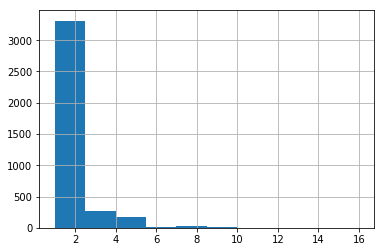

In [112]:
rss.groupby('cluster')['title'].count().hist(range=(1, 16))

In [113]:
rss.groupby('cluster')['title'].count()[rss.groupby('cluster')['title'].count() > 6]

cluster
0        9
11      15
45       8
50       8
73       7
82       7
83       8
100      9
104      7
127      8
139      7
152      7
154     10
176      8
186      9
206      7
253      7
261      9
267      7
295      7
306      7
322      8
353      8
376      9
381      8
485      9
603      7
690      8
741     13
757     11
806      7
1030    13
1037    17
1112    10
1294     7
1500     7
1571     8
Name: title, dtype: int64

In [117]:
rss[rss.cluster == 1571].title.values

array(['В России выявили 32,1 тыс. случаев коронавируса за сутки',
       'В России за сутки выявили 32 136 новых случаев коронавируса',
       'В России за сутки выявили 32 136 случаев заражения коронавирусом',
       'В России выявили 32\xa0930 случаев коронавируса за сутки',
       'За сутки в России выявили 32 136 новых случаев COVID-19. От инфекции скончались еще 1184 человека ',
       'За сутки в России выявили 32 136 случаев коронавируса',
       'За сутки в России выявили 32 602 заболевших коронавирусом',
       'За сутки в России выявили почти 33 тысячи заболевших коронавирусом'],
      dtype=object)